# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Shilpa| secret|
|Thomas| secret|
| | |
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
# condo/pip install pydot
from rdflib import  Graph, BNode, URIRef, Literal, Namespace
from rdflib.namespace import OWL, FOAF
from networkx import nx
import matplotlib.pyplot as plt
import urllib.parse
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [3]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')


<Graph identifier=N5b64974c0b544ac6888e79d86085b699 (<class 'rdflib.graph.Graph'>)>

In [4]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Berry_Gordy')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/WABC_(AM)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

In [5]:
qres = g.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 9368,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Berry_Gordy')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/WABC_(AM)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))])

# 1. Family based Networkx Graph

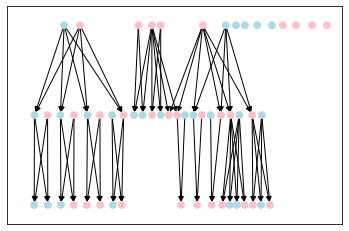

In [6]:
H = nx.DiGraph()

# de mannen en de vrouwen in dit netwerk
M,V= {"Robert Kardashian", "Scott Disick", "Kanye West", "Tristan Thompson", "Rob Kardashian", "Travis Scott", 
      "Brandon Jenner", "Burt Jenner", "Brody Jenner", "Mason Disick", "Saint West", "Psalm West",
    "Philip, Duke of Edinburgh", "Charles, Prince of Wales", "Andrew, Duke of York", "Edward, Earl of Sussex",
     "Captain Mark Philips", "Vice-Admiral Timothy Laurence", "Peter Philips", "Mike Tindall", "William, Duke of Cambridge",
     "Harry, Duke of Sussex", "James, Viscount Severn", "Edoardo Mapelli Mozzi", "Jack Brooksbank"}, {"Kris Jenner",
     "Caitlyn Jenner", "Linda Thompson", "Chrystie Jenner", "Kourtney Kardashian", "Kim Kardashian", "Khloe Kardashian", 
     "Blac Chyna", "Kendall Jenner", "Kylie Jenner", "Cassandra Marino", "Penelope Disick", "Reign Disick",
     "North West", 
     "Chicago West", "True Thompson", "Dream Kardashian", "Stormi Webster", "Queen Elizabeth II", "Anne, Princess Royal",
     "Diana, Princess of Wales", "Camilla, Duchess of Cornwall", "Sarah, Duchess of York", "Sophie, Countess of Wessex",
     "Zara Tindall", "Autumn Philips", "Princess Beatrice of York", "Princess Eugenie of York", "Lady Louise Windsor", "Catherine, Duchess of Cambridge",
     "Megan, Duchess of Sussex"}

# print(len(M), len(V))

for node in M:
    H.add_node(node, color="lightblue")
    H.nodes[node]['M']=True
    H.nodes[node]['V']=False
for node in V:
    H.add_node(node, color="pink")
    H.nodes[node]['M']=False
    H.nodes[node]['V']=True

# colors = nx.get_node_attributes(H, "color")
colors = [H.nodes[n]['color'] for n in H.nodes]
# print(colors)

ouder_kind = [("Robert Kardashian", "Kourtney Kardashian"), ("Robert Kardashian", "Kim Kardashian"),
                  ("Robert Kardashian", "Khloe Kardashian"), ("Robert Kardashian", "Rob Kardashian"),
                  ("Kris Jenner", "Kourtney Kardashian"), ("Kris Jenner", "Kim Kardashian"), 
                  ("Kris Jenner", "Khloe Kardashian"), ("Kris Jenner", "Rob Kardashian"), 
                  ("Kris Jenner","Kendall Jenner"), ("Kris Jenner", "Kylie Jenner"),
                  ("Caitlyn Jenner", "Kendall Jenner"), ("Caitlyn Jenner", "Kylie Jenner"), 
                  ("Caitlyn Jenner", "Brody Jenner"), ("Caitlyn Jenner", "Brandon Jenner"), 
                  ("Caitlyn Jenner", "Burt Jenner"), ("Caitlyn Jenner", "Cassandra Marino"), 
                  ("Linda Thompson", "Brody Jenner"), ("Linda Thompson", "Brandon Jenner"), 
                  ("Chrystie Jenner", "Burt Jenner"), ("Chrystie Jenner", "Cassandra Marino"), 
                  ("Kourtney Kardashian", "Mason Disick"), ("Kourtney Kardashian", "Reign Disick"), 
                  ("Kourtney Kardashian", "Penelope Disick"), ("Scott Disick", "Mason Disick"), 
                  ("Scott Disick", "Reign Disick"), ("Scott Disick", "Penelope Disick"), 
                  ("Kim Kardashian", "North West"), ("Kim Kardashian", "Saint West"), 
                  ("Kim Kardashian", "Chicago West"), ("Kim Kardashian", "Psalm West"), 
                  ("Kanye West", "North West"), ("Kanye West", "Saint West"), 
                  ("Kanye West", "Chicago West"), ("Kanye West", "Psalm West"), 
                  ("Khloe Kardashian", "True Thompson"), ("Tristan Thompson", "True Thompson"), 
                  ("Rob Kardashian", "Dream Kardashian"), ("Blac Chyna", "Dream Kardashian"), 
                  ("Kylie Jenner", "Stormi Webster"), ("Travis Scott", "Stormi Webster"),
                  ("Queen Elizabeth II", "Charles, Prince of Wales"), ("Queen Elizabeth II", "Anne, Princess Royal"),
                  ("Queen Elizabeth II", "Andrew, Duke of York"), ("Queen Elizabeth II", "Edward, Earl of Sussex"),
                  ("Philip, Duke of Edinburgh", "Charles, Prince of Wales"), 
                  ("Philip, Duke of Edinburgh", "Anne, Princess Royal"),
                  ("Philip, Duke of Edinburgh", "Andrew, Duke of York"), 
                  ("Philip, Duke of Edinburgh", "Edward, Earl of Sussex"),
                  ("Charles, Prince of Wales", "William, Duke of Cambridge"),
                  ("Charles, Prince of Wales", "Harry, Duke of Sussex"),
                  ("Diana, Princess of Wales", "William, Duke of Cambridge"),
                  ("Diana, Princess of Wales", "Harry, Duke of Sussex"),
                  ("Captain Mark Philips", "Peter Philips"), ("Captain Mark Philips", "Zara Tindall"), 
                  ("Anne, Princess Royal", "Peter Philips"), ("Anne, Princess Royal", "Zara Tindall"),
                  ("Andrew, Duke of York", "Princess Beatrice of York"), 
                  ("Andrew, Duke of York", "Princess Eugenie of York"),
                  ("Sarah, Duchess of York", "Princess Beatrice of York"), 
                  ("Sarah, Duchess of York", "Princess Eugenie of York"),
                  ("Edward, Earl of Sussex", "Lady Louise Windsor"), 
                  ("Edward, Earl of Sussex", "James, Viscount Severn"),
                  ("Sophie, Countess of Wessex", "Lady Louise Windsor"),
                  ("Sophie, Countess of Wessex", "James, Viscount Severn")]


H.add_edges_from(ouder_kind)

G=H
def M(x, network=G):
    return network.nodes[x]['M']
def V(x, network=G):
    return network.nodes[x]['V']
def R(x,y,network=G):
    return network.has_edge(x,y)

# Maak graaf met pydot
pos = graphviz_layout(H, prog="dot")    
nx.draw_networkx(H, pos, node_color= colors, with_labels=False, node_size=45)

# Of maak graaf met nx.draw
# nx.draw(H, node_color = colors, with_labels=True)


## 1.1 Converting networkx Graph to rdflib Graph 

In [7]:
h = Graph()

items = H.nodes()

def networkx2RDF(Graph, rdfGraph):
    n = Namespace("http://example.org/people/")
    #add everything to namespace + attributes
    for item in Graph.nodes():
        urlified = urllib.parse.quote_plus(str(item))
        n[urlified]
        rdfGraph.add((n[urlified], OWL.hasAttribute, Literal("M" if Graph.nodes()[item]["M"] else "V")))
    for edge in Graph.edges():
        person1 = n[urllib.parse.quote_plus(str(edge[0]))]
        person2 = n[urllib.parse.quote_plus(str(edge[1]))]
        rdfGraph.add((person1, OWL.hasRelation, person2))
              
#execute
networkx2RDF(H, h)
        
#check        

# for x,y,z in h:
#     if(y == OWL.hasAttribute and z == Literal('M')):
#         print(x,y,z)
#         for a,b,c in h:
#             if(a == x and y == OWL.hasRelation):
#                 print(x, c)


In [8]:
# print volledige graaf in RDF turtle 
print(h.serialize(format="turtle").decode("utf-8"))

@prefix ns1: <http://www.w3.org/2002/07/owl#> .

<http://example.org/people/Autumn+Philips> ns1:hasAttribute "V" .

<http://example.org/people/Blac+Chyna> ns1:hasAttribute "V" ;
    ns1:hasRelation <http://example.org/people/Dream+Kardashian> .

<http://example.org/people/Caitlyn+Jenner> ns1:hasAttribute "V" ;
    ns1:hasRelation <http://example.org/people/Brandon+Jenner>,
        <http://example.org/people/Brody+Jenner>,
        <http://example.org/people/Burt+Jenner>,
        <http://example.org/people/Cassandra+Marino>,
        <http://example.org/people/Kendall+Jenner>,
        <http://example.org/people/Kylie+Jenner> .

<http://example.org/people/Camilla%2C+Duchess+of+Cornwall> ns1:hasAttribute "V" .

<http://example.org/people/Captain+Mark+Philips> ns1:hasAttribute "M" ;
    ns1:hasRelation <http://example.org/people/Peter+Philips>,
        <http://example.org/people/Zara+Tindall> .

<http://example.org/people/Catherine%2C+Duchess+of+Cambridge> ns1:hasAttribute "V" .

<http://exa

## 1.2 SPARQL Queries on Graph

In [9]:
vader = """SELECT DISTINCT ?o ?s
        WHERE {?o owl:hasAttribute "M" .
                ?o owl:hasRelation ?s}"""
moeder = """SELECT DISTINCT ?o ?s
        WHERE {?o owl:hasAttribute "V" .
                ?o owl:hasRelation ?s}"""

oma =  """SELECT DISTINCT ?o ?c
        WHERE {?o owl:hasAttribute "V" .
                ?o owl:hasRelation ?s . 
                ?s owl:hasRelation ?c}"""

opa = """SELECT DISTINCT ?o ?c
        WHERE {?o owl:hasAttribute "M" .
                ?o owl:hasRelation ?s . 
                ?s owl:hasRelation ?c}"""

kleinzoon = """SELECT DISTINCT ?c ?o
        WHERE { ?o owl:hasRelation ?s . 
                ?s owl:hasRelation ?c .
                ?c owl:hasAttribute "M" . }"""

kleindochter = """SELECT DISTINCT ?c ?o
        WHERE { ?o owl:hasRelation ?s . 
                ?s owl:hasRelation ?c .
                ?c owl:hasAttribute "V" . }"""

broer = """SELECT DISTINCT ?c ?s
        WHERE { ?o owl:hasRelation ?s . 
                ?o owl:hasRelation ?c .
                ?c owl:hasAttribute "M" .
                FILTER(?c != ?s)}"""

zus = """SELECT DISTINCT ?c ?s
        WHERE { ?o owl:hasRelation ?s . 
                ?o owl:hasRelation ?c .
                ?c owl:hasAttribute "V" .
                FILTER(?c != ?s)}"""

neef = """SELECT DISTINCT ?x ?c
        WHERE {{ ?o owl:hasRelation ?s . 
                ?o owl:hasRelation ?c .
                ?s owl:hasRelation ?x .
                ?x owl:hasAttribute "M" .
                FILTER(?c != ?s)
                }
                union
                {
                ?o owl:hasRelation ?s . 
                ?o owl:hasRelation ?c .
                ?s owl:hasRelation ?x . 
                ?c owl:hasRelation ?y .
                ?x owl:hasAttribute "M" . 
                FILTER(?c != ?s)
                }
                }
                """
nicht = """SELECT DISTINCT ?x ?c
        WHERE {{ ?o owl:hasRelation ?s . 
                ?o owl:hasRelation ?c .
                ?s owl:hasRelation ?x .
                ?x owl:hasAttribute "V" .
                FILTER(?c != ?s)
                }
                union
                {
                ?o owl:hasRelation ?s . 
                ?o owl:hasRelation ?c .
                ?s owl:hasRelation ?x . 
                ?c owl:hasRelation ?y .
                ?x owl:hasAttribute "V" . 
                FILTER(?c != ?s)
                }
                }
                """

oom = """SELECT DISTINCT ?c ?x
        WHERE { ?o owl:hasRelation ?s . 
                ?o owl:hasRelation ?c .
                ?s owl:hasRelation ?x .
                ?c owl:hasAttribute "M" .
                FILTER(?c != ?s)
                }
                """

tante = """SELECT DISTINCT ?c ?x
        WHERE { ?o owl:hasRelation ?s . 
                ?o owl:hasRelation ?c .
                ?s owl:hasRelation ?x .
                ?c owl:hasAttribute "V" .
                FILTER(?c != ?s)
                }
                """

qres = h.query(tante, initNs={"owl":OWL})
type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 48,
 [(rdflib.term.URIRef('http://example.org/people/Khloe+Kardashian'),
   rdflib.term.URIRef('http://example.org/people/Saint+West')),
  (rdflib.term.URIRef('http://example.org/people/Khloe+Kardashian'),
   rdflib.term.URIRef('http://example.org/people/Psalm+West'))])

## 1.3 Test Orginal Networkx - RDF Graph to Networkx is isomorphic

De stappen om te kijken of de orginele graaf en rdf graaf naar networkx graaf isomorf zijn:

1. Verander RDFlib in een Networkx DiGraph
2. Check met nx.is_isomorphic(Graph1, Graph2) of de grafen isomorf zijn.

Als de grafen niet isomorf zijn kan je kijken waar dat aan ligt door te kijken naar bijvoorbeeld de grootte van Netwerk 1 (hoeveelheid knopen&lijnen) en de grootte van Netwerk 2. Hierdoor kan je zien of er niet knopen of lijnen zijn verdwenen of extra zijn bijgekomen.

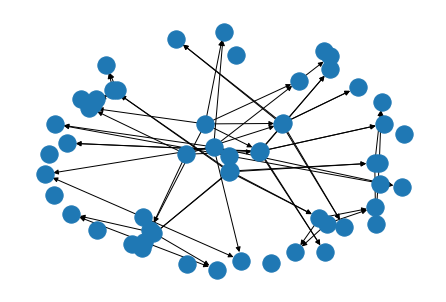

In [10]:
# Stap 1 
def test(RDF_DG):
    rdf_to_DG = nx.DiGraph()
    for s, p, o in h:
    #         print(s,p,o)
            if p == OWL.hasRelation:

                rdf_to_DG.add_node(s)
                rdf_to_DG.add_node(o)
                edge= [(s,o)]
    #             print(edge)
                rdf_to_DG.add_edges_from(edge)

            elif p == OWL.hasAttribute:
                rdf_to_DG.add_node(s)
    return rdf_to_DG

iso = test(h)
nx.draw(iso, with_labels= False)

In [11]:
# Stap 2:
nx.is_isomorphic(H, iso)

True

In [12]:
# Check de grootte van netwerken
# print(H.number_of_nodes())
# print(iso.number_of_nodes())
print(H.number_of_nodes() == iso.number_of_nodes())
print(H.number_of_edges() == iso.number_of_edges())

True
True


# 2. LHBTIQ++ Networkx Graph

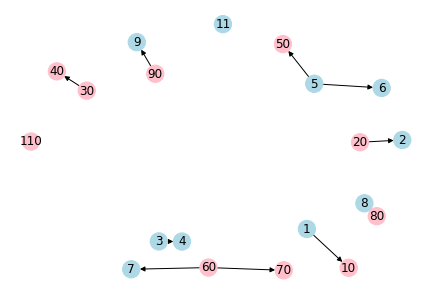

In [13]:
lgbt_graph = nx.DiGraph()

# de mannen en de vrouwen in dit netwerk
M = {1,2,3,4,5,6,7,8,9,11}
V = {10,20,30,40,50,60,70,80,90,110} 

for node in M:
    lgbt_graph.add_node(node, color="lightblue")
    lgbt_graph.nodes[node]['M']=True
    lgbt_graph.nodes[node]['V']=False
    
for node in V:
    lgbt_graph.add_node(node, color="pink")
    lgbt_graph.nodes[node]['M']=False
    lgbt_graph.nodes[node]['V']=True
    

# Heterosexueel Man->Vrouw
lgbt_graph.add_edge(1, 10)

# Heterosexueel Vrouw->Man
lgbt_graph.add_edge(20, 2)

# Homosexueel
lgbt_graph.add_edge(3, 4)

# Lesbianisme
lgbt_graph.add_edge(30, 40)

# Bisexueel Man
lgbt_graph.add_edge(5, 6)
lgbt_graph.add_edge(5, 50)

# Bisexueel Vrouw
lgbt_graph.add_edge(60, 7)
lgbt_graph.add_edge(60, 70)

# Transgender Man->Vrouw
lgbt_graph.add_edge(8, 80)

# Transgender Vrouw->Man
lgbt_graph.add_edge(90, 9)

# Asexueel Man = 11

# Asexueel Vrouw = 110

colors = [lgbt_graph.nodes[n]['color'] for n in lgbt_graph.nodes]
    
nx.draw(lgbt_graph, node_color = colors, with_labels=True)

## 2.1 Converting LHBTIQ++ networkx to RDF Graph

In [14]:
l = Graph()
      
# execute
networkx2RDF(lgbt_graph, l)

# print volledige graaf in RDF turtle 
print(l.serialize(format="turtle").decode("utf-8"))

@prefix ns1: <http://www.w3.org/2002/07/owl#> .

<http://example.org/people/1> ns1:hasAttribute "M" ;
    ns1:hasRelation <http://example.org/people/10> .

<http://example.org/people/11> ns1:hasAttribute "M" .

<http://example.org/people/110> ns1:hasAttribute "V" .

<http://example.org/people/20> ns1:hasAttribute "V" ;
    ns1:hasRelation <http://example.org/people/2> .

<http://example.org/people/3> ns1:hasAttribute "M" ;
    ns1:hasRelation <http://example.org/people/4> .

<http://example.org/people/30> ns1:hasAttribute "V" ;
    ns1:hasRelation <http://example.org/people/40> .

<http://example.org/people/5> ns1:hasAttribute "M" ;
    ns1:hasRelation <http://example.org/people/50>,
        <http://example.org/people/6> .

<http://example.org/people/60> ns1:hasAttribute "V" ;
    ns1:hasRelation <http://example.org/people/7>,
        <http://example.org/people/70> .

<http://example.org/people/8> ns1:hasAttribute "M" ;
    ns1:hasRelation <http://example.org/people/80> .

<http://exam

## 2.2 LHBTIQ++ SPARQL Queries

In [15]:
lesbisch = """SELECT DISTINCT ?o ?s
        WHERE {?o owl:hasAttribute "V" .
                ?o owl:hasRelation ?s . 
                ?s owl:hasAttribute "V"}"""

homo =  """SELECT DISTINCT ?o ?s
        WHERE {?o owl:hasAttribute "M" .
                ?o owl:hasRelation ?s . 
                ?s owl:hasAttribute "M"}"""

bi =  """SELECT DISTINCT ?o ?s
        WHERE {{?o owl:hasAttribute ?g .
                ?o owl:hasRelation ?s . 
                ?s owl:hasAttribute ?h .
                filter(?g != ?h)
                }
                union
                {
                {?o owl:hasAttribute ?g .
                ?o owl:hasRelation ?s . 
                ?s owl:hasAttribute ?h .
                filter(?g == ?h)
                }"""

hetero = """SELECT DISTINCT ?o ?s
        WHERE {?o owl:hasAttribute ?g .
                ?o owl:hasRelation ?s . 
                ?s owl:hasAttribute ?h .
                filter(?g != ?h)
                }
                """

qres = l.query(homo, initNs={"owl":OWL})
type(qres), len(qres), list(qres)
#type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 2,
 [(rdflib.term.URIRef('http://example.org/people/5'),
   rdflib.term.URIRef('http://example.org/people/6')),
  (rdflib.term.URIRef('http://example.org/people/3'),
   rdflib.term.URIRef('http://example.org/people/4'))])

## 2.3 Test Orginal Networkx - RDF Graph to Networkx is isomorphic

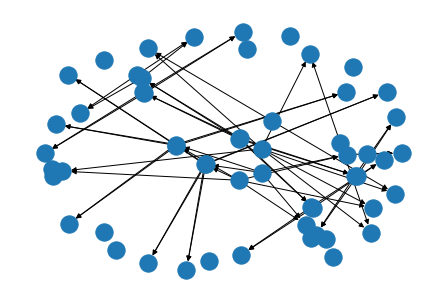

In [16]:
# zie 1.3 voor functie RDF to Networkx
iso2 = test(l)
nx.draw(iso2, with_labels= False)

In [17]:
# Stap 2:
nx.is_isomorphic(H, iso)

True

# 3. Triple store DBPedia 

In [18]:
MR=Graph()
MR.parse("https://dbpedia.org/resource/Mark_Rutte")

<Graph identifier=N76c7bcb8c98a438ea3a463f73dbb91f3 (<class 'rdflib.graph.Graph'>)>

In [19]:
triples= [triple for triple in MR]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/Donald_Tusk'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Mark_Rutte')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Mark_Rutte'),
   rdflib.term.URIRef('http://dbpedia.org/property/birthDate'),
   rdflib.term.Literal('1967-02-14', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date')))],
 1158)

In [20]:
# loop door triple in graaf
for index, (s, p, o) in enumerate(MR):
    print(s, p, o)
    
    if index == 3:
        break

http://dbpedia.org/resource/Donald_Tusk http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Mark_Rutte
http://dbpedia.org/resource/Mark_Rutte http://dbpedia.org/property/birthDate 1967-02-14
http://dbpedia.org/resource/List_of_cabinets_of_the_Netherlands http://dbpedia.org/ontology/wikiPageWikiLink http://dbpedia.org/resource/Mark_Rutte
http://dbpedia.org/resource/Mark_Rutte http://dbpedia.org/property/wikiPageUsesTemplate http://dbpedia.org/resource/Template:Members_of_the_House_of_Representatives_of_the_Netherlands,_2010–2012


In [21]:
# print grootte van graaf
print(f'graph bestaat uit {len(MR)} feiten ')

graph bestaat uit 1158 feiten 


In [22]:
# print volledige graaf in RDF turtle 
print(MR.serialize(format="turtle").decode("utf-8"))

@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbp: <http://dbpedia.org/property/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dbpedia.org/resource/1967> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Mark_Rutte> .

<http://dbpedia.org/resource/2006_in_the_Netherlands> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Mark_Rutte> .

<http://dbpedia.org/resource/2006–2007_Dutch_cabinet_formation> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Mark_Rutte> .

<http://dbpedia.org/resource/2010_Lisbon_summit> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Mark_Rutte> .

<http://dbpedia.org/resource/2010_in_the_Netherlands> dbo:wikiPageWikiLink <http://dbpedia.org/resource/Mark_Rutte> .


In [23]:
# check if triple really exists in the graph
from rdflib import URIRef

# kijkt of sub, pred, obj in graph zitten
if (s, p, o) in MR:
    print("Triple bestaat")
else:
    print("Triple bestaat niet")

# Je kan ook checken of een andere subject/resource voorkomt
# if (URIRef("https://dbpedia.org/resource/Donald_Trump"), None, None) in MR:
#     print("Triple bestaat")
# else:
#     print("Triple bestaat niet")


Triple bestaat


## 3.1 Turn Triple store into Networkx Graph 

S, P, O: {'relation': rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink')}
S, P, O: {'relation': rdflib.term.URIRef('http://dbpedia.org/property/birthDate')}
S, P, O: {'relation': rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink')}
S, P, O: {'relation': rdflib.term.URIRef('http://dbpedia.org/property/wikiPageUsesTemplate')}
S, P, O: {'relation': rdflib.term.URIRef('http://dbpedia.org/property/primeminister')}
S, P, O: {'relation': rdflib.term.URIRef('http://dbpedia.org/ontology/commander')}


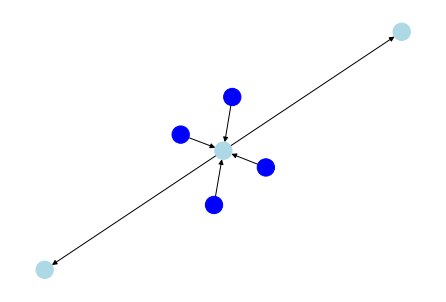

In [24]:
def to_nx_digraph(rdf):
    di_graph = nx.DiGraph() # [(s, o) for s, p, o in rdf]
    counter = 0;
    for s, p, o in rdf:
        #print(s,p,o)
        
        counter += 1;
        di_graph.add_node(s, color="blue")
        di_graph.add_node(o, color="lightblue")

        di_graph.add_edge(s,o)
        di_graph.edges[s, o]['relation'] = p
        print('S, P, O:', di_graph.edges[s,o])
        if(counter == 6):
            break
            
    return di_graph
net= to_nx_digraph(MR)

# colors = nx.get_node_attributes(net, "color")
colors= [net.nodes[n]['color'] for n in net.nodes]

nx.draw(net, node_color=colors)

## 3.2 Some Networkx functions on Graph

In [25]:
# Netwerk grootte
print(f'Netwerk grootte is {net.number_of_nodes()} knopen en {net.number_of_edges()} lijnen')

# Dichtheid
print(f'De dichtheid van het netwerk is {nx.density(net)}')

# Gemiddelde kortste pad
print(f'Lengte van het gemiddelde kortste pad:{nx.average_shortest_path_length(net)}')

# Clusters
cl = nx.clustering(net)
print(f'Het bestaat uit {len(cl)} clusters')

# cluster_dict = {index: len(nodes) for index,nodes in enumerate(cl)}
# print(cluster_dict)

## code om te kijken uit hoeveel knopen een cluster bestaat:
for index,nodes in enumerate(cl):
    print(f'Cluster {index} heeft {len(nodes)} knopen')

print()
# Betweeness centrality  van elke knoop
bc= nx.betweenness_centrality(net)

# Sorteer de meest centrale knoop (persoon) in graaf
mc= sorted([(node, index) for index, node in bc.items()], reverse=True)
print(f'De betweenness centrality van knopen gesorteerd op meest centraal {mc}')
                

Netwerk grootte is 7 knopen en 6 lijnen
De dichtheid van het netwerk is 0.14285714285714285
Lengte van het gemiddelde kortste pad:0.5238095238095238
Het bestaat uit 7 clusters
Cluster 0 heeft 39 knopen
Cluster 1 heeft 38 knopen
Cluster 2 heeft 10 knopen
Cluster 3 heeft 63 knopen
Cluster 4 heeft 106 knopen
Cluster 5 heeft 42 knopen
Cluster 6 heeft 76 knopen

De betweenness centrality van knopen gesorteerd op meest centraal [(0.26666666666666666, rdflib.term.URIRef('http://dbpedia.org/resource/Mark_Rutte')), (0.0, rdflib.term.Literal('1967-02-14', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date'))), (0.0, rdflib.term.URIRef('http://dbpedia.org/resource/Template:Members_of_the_House_of_Representatives_of_the_Netherlands,_2010–2012')), (0.0, rdflib.term.URIRef('http://dbpedia.org/resource/List_of_cabinets_of_the_Netherlands')), (0.0, rdflib.term.URIRef('http://dbpedia.org/resource/Jet_Bussemaker')), (0.0, rdflib.term.URIRef('http://dbpedia.org/resource/Donald_Tusk')), (0

## 3.3 Opgave Voorbeeld

In [26]:
# Kijk waar Mark Rutte zijn educatie heeft gehad
result = MR.query("""SELECT DISTINCT ?o WHERE 
{ 
    ?s dbp:education ?o .

}"""
)
print(list(result))

[(rdflib.term.Literal('Leiden University', lang='en'),)]


In [27]:
# Filter om te kijken waar de taal Engels is
qres = MR.query("""SELECT DISTINCT ?s ?p ?o WHERE { ?s ?p ?o. FILTER(lang(?o) = 'en') }""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 11,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/Mark_Rutte'),
   rdflib.term.URIRef('http://dbpedia.org/property/monarch'),
   rdflib.term.Literal('Willem-Alexander', lang='en')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Mark_Rutte'),
   rdflib.term.URIRef('http://dbpedia.org/property/education'),
   rdflib.term.Literal('Leiden University', lang='en'))])